In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6465 - loss: 1.2212 - val_accuracy: 0.8894 - val_loss: 0.3754
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8961 - loss: 0.3613 - val_accuracy: 0.9091 - val_loss: 0.3066
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9108 - loss: 0.3042 - val_accuracy: 0.9199 - val_loss: 0.2695
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9202 - loss: 0.2673 - val_accuracy: 0.9247 - val_loss: 0.2493
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9329 - loss: 0.2323 - val_accuracy: 0.9368 - val_loss: 0.2138
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9402 - loss: 0.2036 - val_accuracy: 0.9392 - val_loss: 0.1951
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9458 - loss: 0.1804 - val_accuracy: 0.9461 - val_loss: 0.1758
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9537 - loss: 0.1551 - 

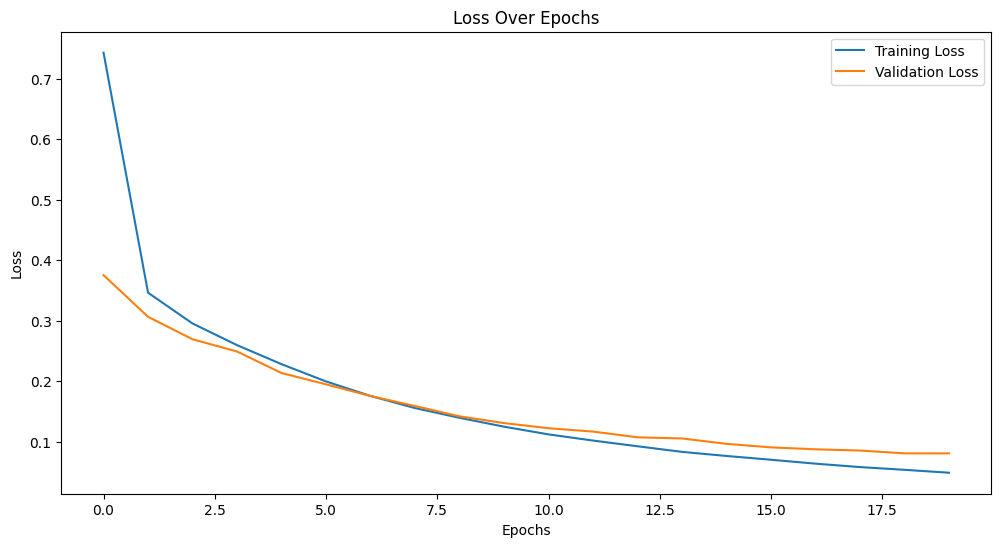

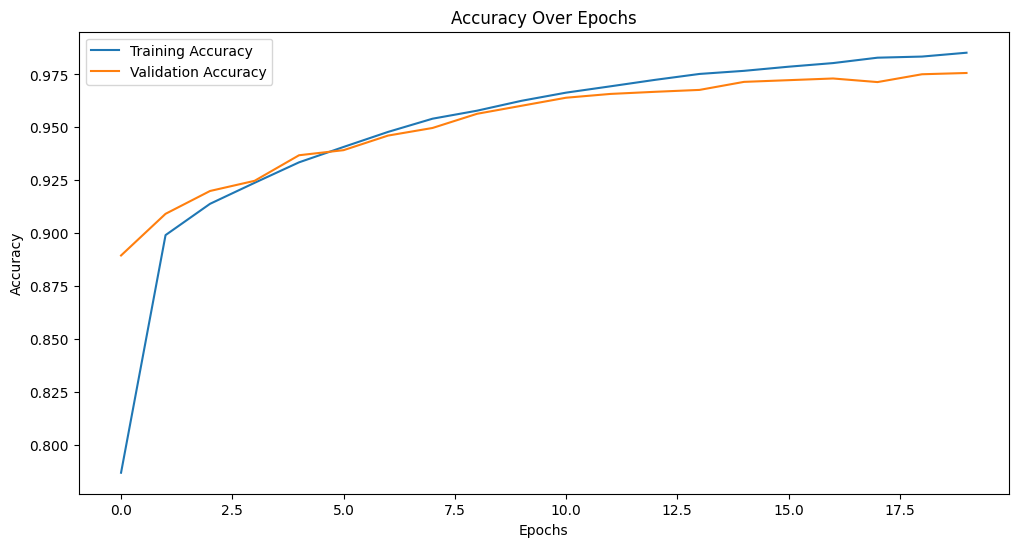

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.0915
Test accuracy: 0.9757
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


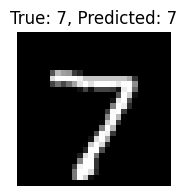

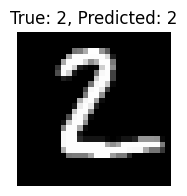

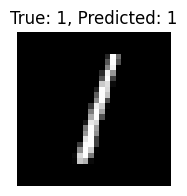

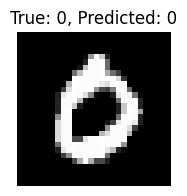

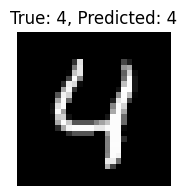

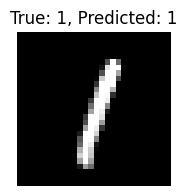

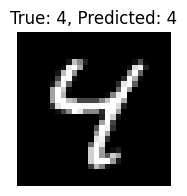

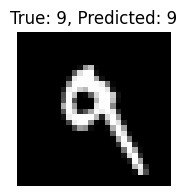

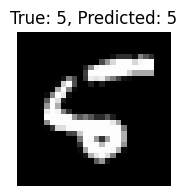

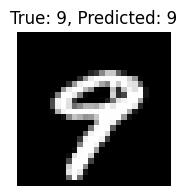

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=50, epochs=20, validation_data=(x_test, y_test))

# Plot training vs validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training vs validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

num_samples = 10
predictions = model.predict(x_test[:num_samples])

predicted_labels = np.argmax(predictions, axis=1)

# Display the images with their predicted and true labels
for i in range(num_samples):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()
